# Text Analysis of Succession - 4x06 "Living+" - Post Episode Discussion from Reddit

In [1]:
!pip install praw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install --upgrade praw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import praw
from nltk.sentiment import SentimentIntensityAnalyzer

In [4]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## Connection to Reddit

In [5]:
''' # create a Reddit instance
reddit = praw.Reddit(client_id='your_client_id',
                     client_secret='your_client_secret',
                     username='your_username',
                     password='your_password',
                     user_agent='your_user_agent')
'''

import pickle

# Open the reddit variable with app values as a pickle file
with open('reddit.pickle', 'rb') as f:
    reddit = pickle.load(f)

In [6]:
import re

# example Reddit post URL
url = 'https://www.reddit.com/r/SuccessionTV/comments/1349pq7/succession_4x06_living_post_episode_discussion/'

# extract the subreddit name and post ID from the URL
match = re.search(r'/r/(\w+)/comments/(\w+)/', url)
subreddit_name = match.group(1)
post_id = match.group(2)

print(subreddit_name, post_id)

SuccessionTV 1349pq7


## Sentiment Analysis

We'll be doing an analysis of 500 posts.

In [7]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

In [8]:
import warnings
warnings.filterwarnings("ignore", message=".*Using an asynchronous PRAW instance.*")


In [9]:
# get the subreddit and post using PRAW
subreddit = reddit.subreddit(subreddit_name)
post = reddit.submission(id=post_id)

# analyze the sentiment of each comment in the post
for comment in post.comments.list():
    if isinstance(comment, praw.models.MoreComments):
        continue
    sentiment = sia.polarity_scores(comment.body)
    print(f"Comment: {comment.body}")
    print(f"Sentiment: {sentiment}\n")

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Comment: I died inside when Ken said “it’s like social media in real life”
Sentiment: {'neg': 0.224, 'neu': 0.621, 'pos': 0.155, 'compound': -0.2732}

Comment: “How am I supposed to follow this? He just promised them eternal life.” 

Tom. Never Change.
Sentiment: {'neg': 0.0, 'neu': 0.848, 'pos': 0.152, 'compound': 0.3612}

Comment: Most of all I just loved Shiv’s call with Matsson while Tom is in the room with his feet up. Finally the problematic power couple of my dreams.
Sentiment: {'neg': 0.087, 'neu': 0.716, 'pos': 0.197, 'compound': 0.5719}

Comment: ***Big Shoes***
Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Comment: Karl is fucking on one this season
Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Comment: Kendall needs to forget being a media mogul and pursue his natural passion as a theatre director
Sentiment: {'neg': 0.098, 'neu': 0.619, 'pos': 0.284, 'compound': 0.5574}

Comment: The ghost of Logan promoting “Living+”… he is truly the

In [10]:
from nltk.sentiment import SentimentIntensityAnalyzer

# initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# analyze the sentiment of each comment in the post
compound_scores = []
for comment in post.comments.list():
    if isinstance(comment, praw.models.MoreComments):
        continue
    sentiment = sia.polarity_scores(comment.body)
    compound_scores.append(sentiment['compound'])

# calculate the average compound score
average_score = sum(compound_scores) / len(compound_scores)
print(average_score)

0.13489779559118228


A score of 0.13 suggests a slightly positive sentiment.


## Wordcloud

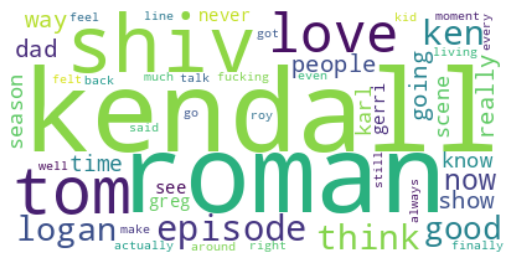

In [11]:
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# extract the comments from the post and remove any MoreComments objects
comments = [comment.body for comment in post.comments.list() if not isinstance(comment, praw.models.MoreComments)]

# add custom stopwords
stop_words = set(STOPWORDS)
stop_words.update(["s", "t", "one", "get", "would", "like", "re"])

# remove stopwords and convert text to lowercase
clean_text = " ".join([word.lower() for word in " ".join(comments).split() if word.lower() not in stop_words])

# generate the wordcloud
wordcloud = WordCloud(stopwords=stop_words, max_words=50, background_color="white").generate(clean_text)

# display the wordcloud
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()